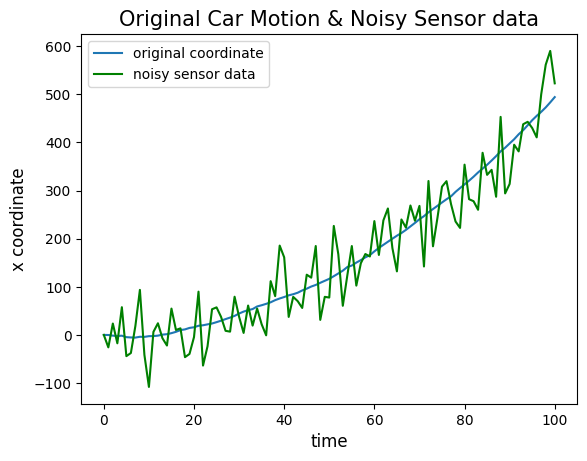

In [3]:
# Ibragimov Aydar, 11-004

## Homework 2

### Create simplified recursive filter and compare its results with 1D Kalman filter

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

# Creation of the toycar's GPS data

N = 100  # number of samples
muPsi, sigmaPsi = 0, 1     # mean and standard deviation that describe the motion model error
muEta, sigmaEta = 0, 50     # mean and standard deviation that describe the sensor error

a = 0.1  # acceleration
x = np.zeros(N+1)
z = np.zeros(N+1)

time = np.arange(0, N+1, 1)

for t in range(0, N):
    x[t+1] = x[t] + a * t + np.random.normal(muPsi, sigmaPsi, 1)
    z[t+1] = x[t+1] + np.random.normal(muEta, sigmaEta, 1)
    
plt.title('Original Car Motion & Noisy Sensor data',fontsize=15)
plt.xlabel('time',fontsize=12)
plt.ylabel('x coordinate',fontsize=12)    
plt.plot(time, x, label='original coordinate')  
plt.plot(time, z, 'g', label='noisy sensor data')  
plt.legend()

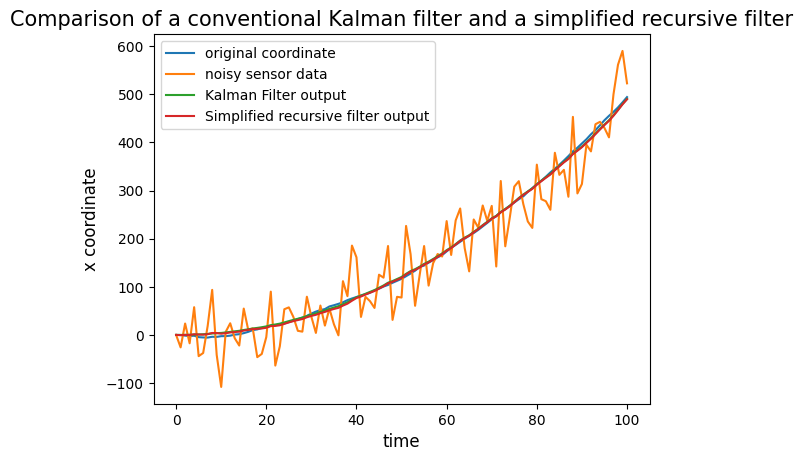

In [4]:
# Linear Kalman Filter

eOpt = np.zeros(N+1)
K    = np.zeros(N+1)
xOpt = np.zeros(N+1)

for t in range(0, N):
    eOpt[t+1] = np.sqrt((sigmaEta**2) * (eOpt[t]**2 + sigmaPsi**2)/(sigmaEta**2 + eOpt[t]**2 + sigmaPsi**2))
    K[t+1] = (eOpt[t+1]**2)/(sigmaEta**2)
    xOpt[t+1] = (xOpt[t]+a*t) * (1-K[t+1]) + K[t+1]*z[t+1]
    
# Simplified recursive filter

simpleXOpt = np.zeros(N+1)
simpleK = 0.02

for t in range(0, N):
    simpleXOpt[t+1] = (simpleXOpt[t] + a * t) * (1 - simpleK) + simpleK * z[t+1]
    
# Demonstration
    
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Comparison of a conventional Kalman filter and a simplified recursive filter', fontsize=15)
plt.xlabel('time', fontsize=12)
plt.ylabel('x coordinate', fontsize=12)
plt.plot(time, x, label='original coordinate')  
plt.plot(time, z, label='noisy sensor data')  
plt.plot(time, xOpt, label='Kalman Filter output') 
plt.plot(time, simpleXOpt, label='Simplified recursive filter output') 
plt.legend()